In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt


0. Prepare data
1. Model 
2. Loss and optimizer 
3. Training Loop 


In [15]:
# 0. Prepare Data
x,y = datasets.make_regression(n_samples=100,n_features=1,noise = 20, random_state=1)

x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32)).view(-1,1)

n_samples, n_features = x.shape


In [16]:
# 1. Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)


In [17]:
# 2. loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [18]:
# 3. Training Loop
n_epoch = 100
for epochs in range(n_epoch):
    #forward pass and loss
    y_predicted = model(x)
    loss = criterion(y,y_predicted)
    
    #backward pass
    loss.backward()

    #update
    optimizer.step()

    #empty gradients
    optimizer.zero_grad()

    if (epochs+1) % 10 == 0:
        print(f'epoch : {epochs+1}, loss = {loss.item():.8f}')


epoch : 10, loss = 4320.20703125
epoch : 20, loss = 3226.82519531
epoch : 30, loss = 2434.98950195
epoch : 40, loss = 1860.96191406
epoch : 50, loss = 1444.44580078
epoch : 60, loss = 1141.96203613
epoch : 70, loss = 922.11853027
epoch : 80, loss = 762.22143555
epoch : 90, loss = 645.84729004
epoch : 100, loss = 561.09759521


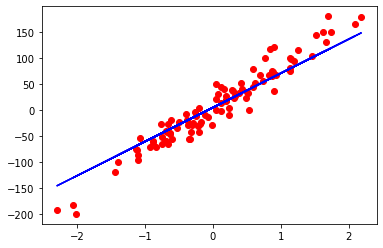

In [19]:
#plot
%matplotlib inline
predicted = model(x).detach().numpy() #do not want this to be a part of our computational graph, also convert to numpy for plotting
x_numpy = x.numpy()
y_numpy = y.numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()